In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL SK 21 3 23/Codes and Data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# split feature and target
# train test data split

X = df.drop("Sales", axis=1)
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Stochastic GD

In [12]:
X_train.shape

(140, 3)

In [14]:
model = Sequential()
model.add(Dense(8, activation="tanh", input_dim=3))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1))

In [15]:
model.compile(optimizer="sgd", loss="mse")

In [16]:
result = model.fit(X_train_ss, y_train, epochs=10, batch_size=1)

Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 27.7087
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 8.4085
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 6.3735
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 6.0370
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 6.0337
Epoch 6/10
140/140 [==============================] - 0s 1ms/step - loss: 6.8080
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 5.2603
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 5.9958
Epoch 9/10
140/140 [==============================] - 0s 1ms/step - loss: 5.9213
Epoch 10/10
140/140 [==============================] - 0s 1ms/step - loss: 4.8141


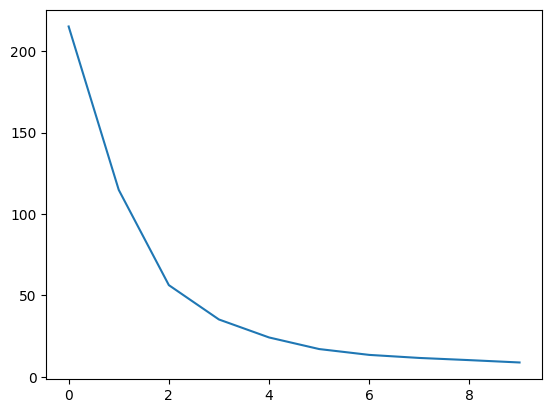

In [ ]:
loss = result.history["loss"]

plt.plot(loss)

In [ ]:
y_pred = model.predict(X_test_ss)

2/2 [==============================] - 0s 9ms/step


In [ ]:
print(y_pred)

[[17.46722  ]
 [17.42244  ]
 [11.445055 ]
 [17.529953 ]
 [17.528208 ]
 [17.552864 ]
 [17.213505 ]
 [17.154243 ]
 [10.054402 ]
 [17.48169  ]
 [17.121725 ]
 [10.506542 ]
 [17.366238 ]
 [15.901613 ]
 [17.451635 ]
 [15.981944 ]
 [16.011936 ]
 [17.515228 ]
 [ 8.212929 ]
 [17.403399 ]
 [12.579746 ]
 [10.646276 ]
 [ 5.722636 ]
 [13.674234 ]
 [14.641672 ]
 [17.294678 ]
 [ 7.887087 ]
 [17.518734 ]
 [17.241161 ]
 [17.488174 ]
 [17.499928 ]
 [17.420193 ]
 [17.015574 ]
 [16.933271 ]
 [17.515741 ]
 [17.277786 ]
 [17.354511 ]
 [14.943595 ]
 [17.477032 ]
 [ 4.9399433]
 [ 3.8006177]
 [10.912378 ]
 [ 4.363745 ]
 [17.470226 ]
 [ 4.183127 ]
 [16.746761 ]
 [13.751748 ]
 [17.508272 ]
 [17.437284 ]
 [17.508625 ]
 [17.556503 ]
 [16.356411 ]
 [ 4.58113  ]
 [17.360153 ]
 [17.461777 ]
 [16.763851 ]
 [17.392632 ]
 [ 4.928574 ]
 [17.396952 ]
 [ 8.0569725]]


In [ ]:
model.evaluate(X_test_ss, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 7.2751


7.27513313293457

# Mini-batch GD

In [17]:
model2 = Sequential()
model2.add(Dense(8, activation="tanh", input_dim=3))
model2.add(Dense(4, activation="tanh"))
model2.add(Dense(1))

In [18]:
X_train_ss.shape

(140, 3)

In [19]:
model2.compile(optimizer="sgd", loss="mse")
model2.fit(X_train_ss, y_train, epochs=10, batch_size=8)

Epoch 1/10
18/18 [==============================] - 1s 5ms/step - loss: 129.9377
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 21.7834
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 10.0810
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 7.6105
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 6.2893
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 6.0089
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 5.1554
Epoch 8/10
18/18 [==============================] - 0s 5ms/step - loss: 4.6938
Epoch 9/10
18/18 [==============================] - 0s 9ms/step - loss: 4.3080
Epoch 10/10
18/18 [==============================] - 0s 6ms/step - loss: 4.0796


In [20]:
model2.evaluate(X_test_ss, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 3.5619


3.5618999004364014

# Gradient Descent

In [21]:
model3 = Sequential()
model3.add(Dense(8, activation="tanh", input_dim=3))
model3.add(Dense(4, activation="tanh"))
model3.add(Dense(1))

In [22]:
model3.compile(optimizer="sgd", loss="mse")
model3.fit(X_train_ss, y_train, epochs=10, batch_size=140)

Epoch 1/10
1/1 [==============================] - 0s 393ms/step - loss: 254.1004
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 233.8848
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 215.2265
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 195.3220
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 173.5517
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 151.3068
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 130.8329
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 112.9058
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 97.5148
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 84.5635


In [24]:
model3.evaluate(X_test_ss, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 84.5369


84.53694915771484